In [1]:
# for structured data manupulation, data exploration 
import pandas as pd

# for numerical computin in python
import numpy as np

# for data visulisation and graph ploting 
import matplotlib.pyplot as plt

# for  scatter plots, heatmaps, distribution plots
import seaborn as sns

# for spliting data in train and test 
from sklearn.model_selection import train_test_split

# for ploting the data in decision tree import decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# for data preprocessing 
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler  # scales features using statistics that are robust to outliers
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Titanic_Train dataset
X_train = pd.read_csv('Assignmet _Data/Titanic Data/train.csv')
X_train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
X_train.isnull().sum() # To check the missing values in the data set

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Load the Titanic_Test dataset (New set of data containing independent variables)
Y_train= pd.read_csv('Assignmet _Data/Titanic Data/test.csv')
Y_train.head(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


In [5]:
Y_train.isnull().sum() # To check the missing values in the data set

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# New set of data containing Dependend variables (i.e. survival details ) w.r.t. Y_train datas....
y_test= pd.read_csv('Assignmet _Data/Titanic Data/gender_submission.csv')
y_test.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [7]:
X_train.shape , Y_train.shape , y_test.shape

((891, 12), (418, 11), (418, 2))

#### Asper the details & shape of the data set following are the observations:
##### 1) X_train - contains both indep. & depnd..feature which needs for training the models
##### 2) Y_train - contains only indep..feature & Y_test - contains only depnd..features  which helps for model evaluation.

##### Hence befor proceed further we need to handel the missing values in both X_train & y_train data set... SO here we combine these two data set in a single data frame to perform EDA to treat missing features and outliers 

#### Check Column Names in a proper order, befor Concat (Combine) X_train & Y_train Data 

In [8]:
X_train.columns , Y_train.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

#### in the X_train data set "Survived" is the dependent deature, Which should be in the last column and rest indep.. features are on it's right side.

In [9]:
# Assuming df is your DataFrame
X_train['NewOrder'] = X_train['Survived']  # Creating a new column with the values of the 2nd column
X_train = X_train.drop('Survived', axis=1)  # Dropping the 2nd column from its original position
X_train = X_train.rename(columns={'NewOrder': 'Survived'})  # Renaming the new column to the original column name

# Now, 'Survived' will be the last column in the DataFrame


In [10]:
# This line of code essentially counts the number of columns that are different between X_train and Y_train excluding the last column from X_train.
# It could be useful for checking column mismatches or inconsistencies between the two datasets.
(X_train.columns[:-1]!=Y_train.columns).sum()

0

In [11]:
# Merging these two data set into a single data set.
df = pd.concat([X_train, Y_train],ignore_index=True, sort = False )
df.shape

(1309, 12)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000


In [13]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [14]:
# Check for missing values
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

In [15]:
 df.describe(exclude=np.number).T  ## describe the catagoriccal variables on the data set...

,count,unique,top,freq
Name,1309,1307,"Connolly, Miss. Kate",2
Sex,1309,2,male,843
Ticket,1309,929,CA. 2343,11
Cabin,295,186,C23 C25 C27,6
Embarked,1307,3,S,914


In [16]:
# Review the 'Object type' features only form the data set. 
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      1309 non-null   object
 1   Sex       1309 non-null   object
 2   Ticket    1309 non-null   object
 3   Cabin     295 non-null    object
 4   Embarked  1307 non-null   object
dtypes: object(5)
memory usage: 51.3+ KB


In [17]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

### Treating Missing Values on the data set

In [18]:
# Treating the numerical missing feature with mean() values of the resective feature 
for col in df.columns[:-1]:  # Exclude the last column
    if df[col].dtype != 'object' and df[col].isna().sum() > 0:
        df[col].fillna(value=df[col].mean(), inplace=True)

In [19]:
df['Age'] = df['Age'].round()
df['Age'].unique()

array([22., 38., 26., 35., 30., 54.,  2., 27., 14.,  4., 58., 20., 39.,
       55., 31., 34., 15., 28.,  8., 19., 40., 66., 42., 21., 18.,  3.,
        7., 49., 29., 65.,  5., 11., 45., 17., 32., 16., 25.,  1., 33.,
       23., 24., 46., 59., 71., 37., 47., 70., 12.,  9., 36., 51., 56.,
       44., 61., 50., 62., 41., 52., 63., 43., 60., 10., 64., 13., 48.,
       53., 57., 80.,  6.,  0., 74., 67., 76.])

In [20]:
## Ages are in the form of int. asper the age group catagorise the age, to reduce the age as an outlier.....
age_ranges = [(0, 12), (13, 18), (19, 35), (36, 60), (61, 100)]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# Create a new column 'AgeGroup' with the assigned age group labels
df['Age'] = pd.cut(df['Age'], bins=[age_range[0] - 1 for age_range in age_ranges] + [age_ranges[-1][1]], right=True, labels=age_labels)

# Display the updated DataFrame
df.head(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,Young Adult,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C,1.0
2,3,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,53.1000,C123,S,1.0
4,5,3,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,8.0500,NaN,S,0.0
5,6,3,"Moran, Mr. James",male,Young Adult,0,0,330877,8.4583,NaN,Q,0.0
6,7,1,"McCarthy, Mr. Timothy J",male,Adult,0,0,17463,51.8625,E46,S,0.0
7,8,3,"Palsson, Master. Gosta Leonard",male,Child,3,1,349909,21.0750,NaN,S,0.0


In [21]:
# Check the distribution of 'Embarked'
print(df['Embarked'].value_counts())

# Fill missing values in 'Embarked' with the most frequent value (mode)
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Verify that there are no missing values after filling
print(df['Embarked'].isnull().sum())


Embarked
S    914
C    270
Q    123
Name: count, dtype: int64
0


In [22]:
# Create a new column 'Cabin_Missing' indicating whether the cabin information is missing
df['Cabin_Missing'] = df['Cabin'].isnull().astype(int)

# Display the updated DataFrame
print(df[['Cabin', 'Cabin_Missing']].head())


  Cabin  Cabin_Missing
0   NaN              1
1   C85              0
2   NaN              1
3  C123              0
4   NaN              1


In [23]:
# Drop the original 'Cabin' column .
df.drop('Cabin', axis=1, inplace=True)

In [24]:
# Mapping Pclass to Class
class_mapping = {1: '1st_class', 2: '2nd_class', 3: '3rd_class'}

# Apply the mapping to create a new 'Class' column
df['Pclass'] = df['Pclass'].map(class_mapping)

# Display the updated DataFrame
df.sample(8)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin_Missing
433,434,3rd_class,"Kallio, Mr. Nikolai Erland",male,Teenager,0,0,STON/O 2. 3101274,7.1250,S,0.0,1
139,140,1st_class,"Giglio, Mr. Victor",male,Young Adult,0,0,PC 17593,79.2000,C,0.0,0
159,160,3rd_class,"Sage, Master. Thomas Henry",male,Young Adult,8,2,CA. 2343,69.5500,S,0.0,1
655,656,2nd_class,"Hickman, Mr. Leonard Mark",male,Young Adult,2,0,S.O.C. 14879,73.5000,S,0.0,1
528,529,3rd_class,"Salonen, Mr. Johan Werner",male,Adult,0,0,3101296,7.9250,S,0.0,1
888,889,3rd_class,"Johnston, Miss. Catherine Helen ""Carrie""",female,Young Adult,1,2,W./C. 6607,23.4500,S,0.0,1
622,623,3rd_class,"Nakid, Mr. Sahid",male,Young Adult,1,1,2653,15.7417,C,1.0,1
389,390,2nd_class,"Lehmann, Miss. Bertha",female,Teenager,0,0,SC 1748,12.0000,C,1.0,1


In [25]:
# Check for missing values
df.isnull().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
Survived         418
Cabin_Missing      0
dtype: int64

In [26]:
# Create a new feature 'Family_Size'
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

# Display the updated DataFrame
print(df[['SibSp', 'Parch', 'Family_Size']].head())


   SibSp  Parch  Family_Size
0      1      0            2
1      1      0            2
2      0      0            1
3      1      0            2
4      0      0            1


In [27]:
df.sample(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin_Missing,Family_Size
1151,1152,3rd_class,"de Messemaeker, Mr. Guillaume Joseph",male,Adult,1,0,345572,17.4000,S,NaN,1,2
1277,1278,3rd_class,"Aronsson, Mr. Ernst Axel Algot",male,Young Adult,0,0,349911,7.7750,S,NaN,1,1
10,11,3rd_class,"Sandstrom, Miss. Marguerite Rut",female,Child,1,1,PP 9549,16.7000,S,1.0,0,3
478,479,3rd_class,"Karlsson, Mr. Nils August",male,Young Adult,0,0,350060,7.5208,S,0.0,1,1
236,237,2nd_class,"Hold, Mr. Stephen",male,Adult,1,0,26707,26.0000,S,0.0,1,2
551,552,2nd_class,"Sharp, Mr. Percival James R",male,Young Adult,0,0,244358,26.0000,S,0.0,1,1
1159,1160,3rd_class,"Howard, Miss. May Elizabeth",female,Young Adult,0,0,A. 2. 39186,8.0500,S,NaN,1,1
821,822,3rd_class,"Lulic, Mr. Nikola",male,Young Adult,0,0,315098,8.6625,S,1.0,1,1


## Data Visualisasion

In [28]:
# Calculate and print the exact numbers of survivals..?
survived_count = df['Survived'].sum()
died_count = df['Survived'].count() - survived_count

print(f'Number of Passengers Survived: {survived_count}')
print(f'Number of Passengers Died: {died_count}')

Number of Passengers Survived: 342.0
Number of Passengers Died: 549.0


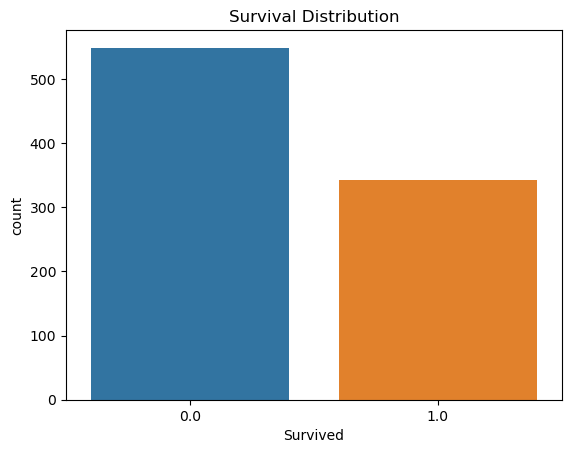

In [29]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

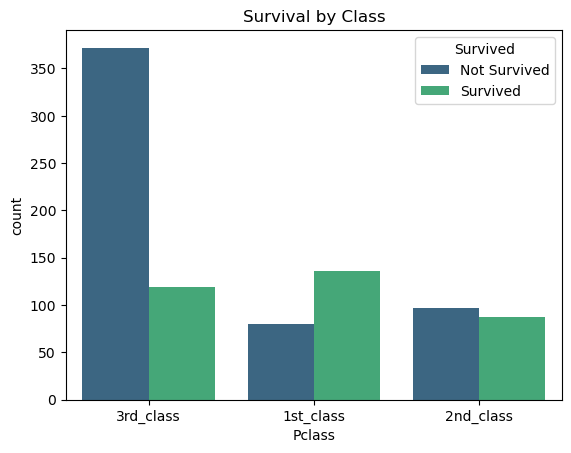

In [30]:
# Exclude rows where 'Survived' is null
df_1 = df.dropna(subset=['Survived'])

# Convert 'Survived' column to categorical with labels 'Survived' and 'Not Survived'
df_1.loc[:, 'Survived'] = df_1['Survived'].apply(lambda x: 'Survived' if x == 1.0 else 'Not Survived')

# Create countplot
sns.countplot(x='Pclass', hue='Survived', palette='viridis', data=df_1)
plt.title('Survival by Class')
plt.show()

In [31]:
df_1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin_Missing,Family_Size
0,1,3rd_class,"Braund, Mr. Owen Harris",male,Young Adult,1,0,A/5 21171,7.2500,S,Not Survived,1,2
1,2,1st_class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C,Survived,0,2
2,3,3rd_class,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,7.9250,S,Survived,1,1
3,4,1st_class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,53.1000,S,Survived,0,2
4,5,3rd_class,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,8.0500,S,Not Survived,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2nd_class,"Montvila, Rev. Juozas",male,Young Adult,0,0,211536,13.0000,S,Not Survived,1,1
887,888,1st_class,"Graham, Miss. Margaret Edith",female,Young Adult,0,0,112053,30.0000,S,Survived,0,1
888,889,3rd_class,"Johnston, Miss. Catherine Helen ""Carrie""",female,Young Adult,1,2,W./C. 6607,23.4500,S,Not Survived,1,4
889,890,1st_class,"Behr, Mr. Karl Howell",male,Young Adult,0,0,111369,30.0000,C,Survived,0,1


In [32]:
class_survived = pd.crosstab(df_1['Pclass'], df_1['Survived'])
print(class_survived)

Survived   Not Survived  Survived
Pclass                           
1st_class            80       136
2nd_class            97        87
3rd_class           372       119


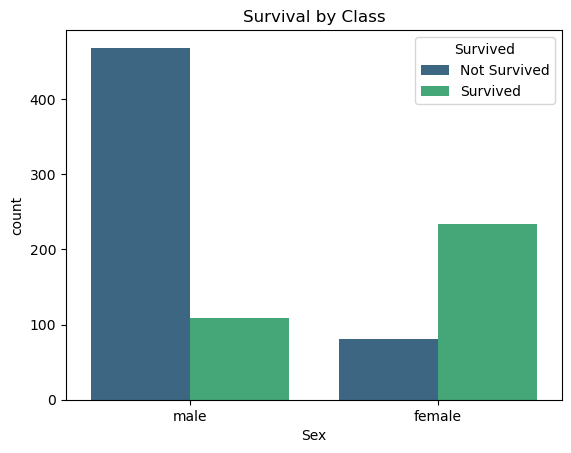

In [33]:
# Create countplot
sns.countplot(x='Sex', hue='Survived', palette='viridis', data=df_1)
plt.title('Survival by Class')
plt.show()

In [34]:
class_survived = pd.crosstab(df_1['Sex'], df_1['Survived'])
print(class_survived)

Survived  Not Survived  Survived
Sex                             
female              81       233
male               468       109


/home/debasish/anaconda3/envs/new_env39/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/debasish/anaconda3/envs/new_env39/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


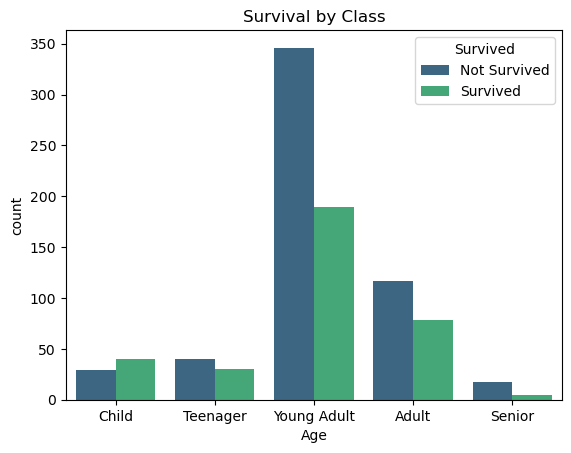

In [35]:
# Create countplot
sns.countplot(x='Age', hue='Survived', palette='viridis', data=df_1)
plt.title('Survival by Class')
plt.show()

In [36]:
class_survived = pd.crosstab(df_1['Age'],df_1['Survived'])
print(class_survived)

Survived     Not Survived  Survived
Age                                
Child                  29        40
Teenager               40        30
Young Adult           346       189
Adult                 117        78
Senior                 17         5


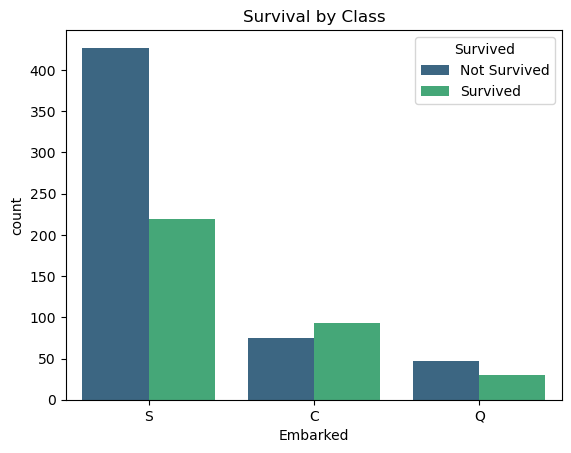

In [37]:
# Create countplot
sns.countplot(x='Embarked', hue='Survived', palette='viridis', data=df_1)
plt.title('Survival by Class')
plt.show()

In [38]:
class_survived = pd.crosstab(df_1['Embarked'],df_1['Survived'])
print(class_survived)

Survived  Not Survived  Survived
Embarked                        
C                   75        93
Q                   47        30
S                  427       219


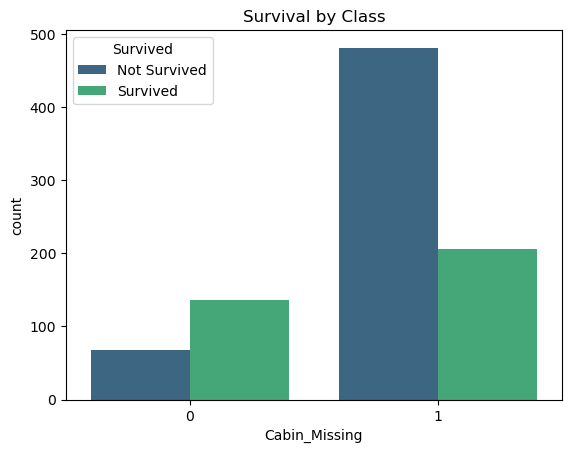

In [39]:
# Create countplot
sns.countplot(x='Cabin_Missing', hue='Survived', palette='viridis', data=df_1)
plt.title('Survival by Class')
plt.show()

In [40]:
class_survived = pd.crosstab(df_1['Cabin_Missing'],df_1['Survived'])
print(class_survived)

Survived       Not Survived  Survived
Cabin_Missing                        
0                        68       136
1                       481       206


### Perform data exploration for outlier Detection

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.0,328.0000,655.0000,982.000,1309.0000
SibSp,1309.0,0.498854,1.041658,0.0,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.0,0.0000,0.0000,0.000,9.0000
Fare,1309.0,33.295479,51.738879,0.0,7.8958,14.4542,31.275,512.3292
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.000,1.0000
Cabin_Missing,1309.0,0.774637,0.417981,0.0,1.0000,1.0000,1.000,1.0000
Family_Size,1309.0,1.883881,1.583639,1.0,1.0000,1.0000,2.000,11.0000


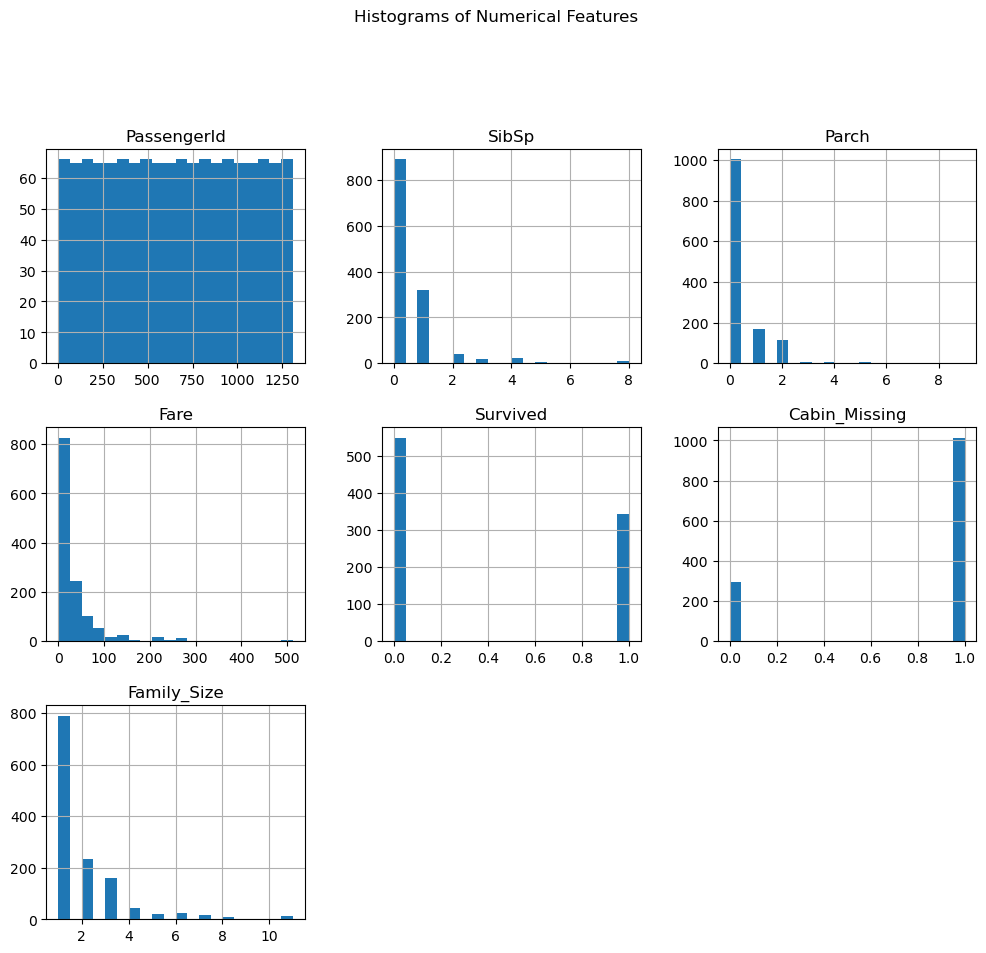

In [42]:
### Display histograms for numerical features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

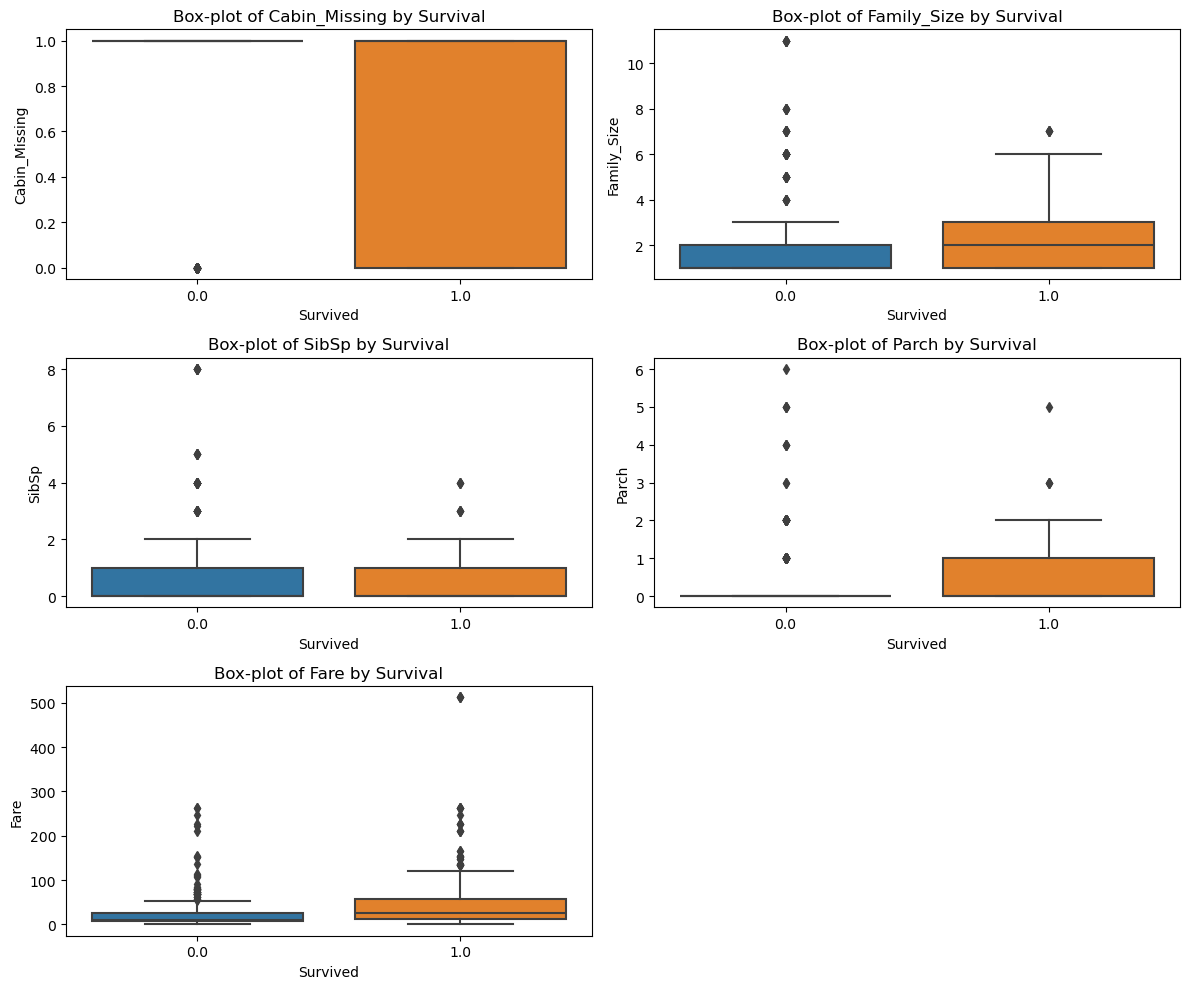

In [43]:
# Display box-plots for numerical features
numerical_features = ['Cabin_Missing', 'Family_Size', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Survived', y=feature, data=df)
    plt.title(f'Box-plot of {feature} by Survival')
plt.tight_layout()
plt.show()


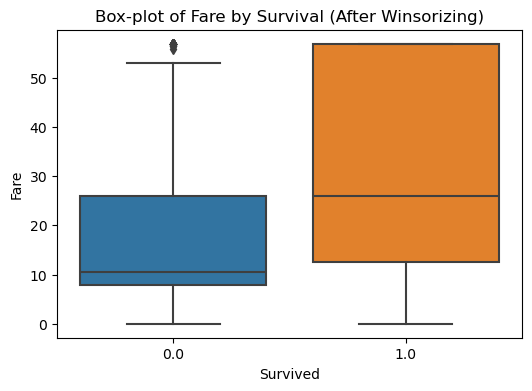

In [44]:
# Calculate the 95th percentile of Fare
fare_threshold = df['Fare'].quantile(0.85)
fare_threshold
# Winsorize the 'Fare' feature
df['Fare'] = df['Fare'].clip(upper=fare_threshold)

# Display box-plot after winsorizing
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Box-plot of Fare by Survival (After Winsorizing)')
plt.show()

In [45]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived', 'Cabin_Missing',
       'Family_Size'],
      dtype='object')

In [46]:
df = pd.get_dummies(df, columns=['Pclass','Sex','Age', 'Embarked'])

In [47]:
# List of boolean columns to convert to numeric
bool_columns = ['Pclass_1st_class', 'Pclass_2nd_class', 'Pclass_3rd_class', 'Age_Teenager', 'Sex_female','Age_Young Adult',  'Sex_male', 'Age_Child', 'Age_Adult', 'Age_Senior','Embarked_S','Embarked_C','Embarked_Q']

# Convert boolean columns to numeric
df[bool_columns] = df[bool_columns].astype(int)

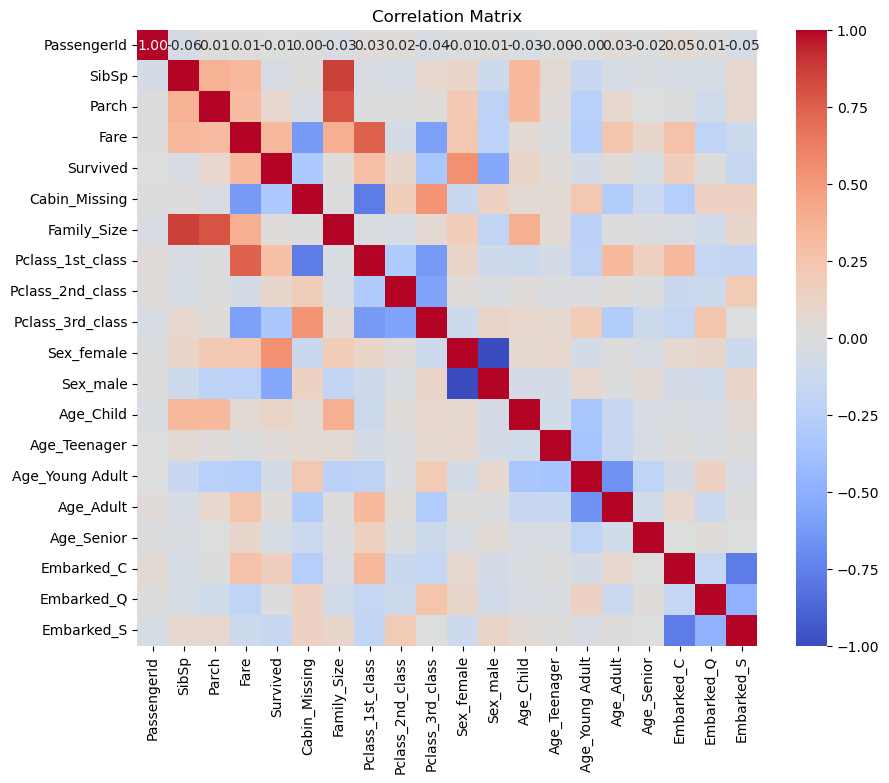

In [48]:
# Exclude non-numeric columns when calculating the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [49]:
# Drop 'Name' and 'Ticket' columns from df_combined
df = df.drop(columns=['Name', 'Ticket','PassengerId' ])

In [50]:

# Separate df_combined back into train_data and test_data based on the 'Survived' column
x_train = df[df['Survived'].notnull()]
y_train = df[df['Survived'].isnull()].drop(columns=['Survived'])

# Display the shapes of the resulting DataFrames
print("Train Data Shape:", x_train.shape)
print("Test Data Shape:", y_train.shape)


Train Data Shape: (891, 19)
Test Data Shape: (418, 18)


In [51]:
# Shoftong the 'Survived' cloumn to the last last clomn. form the middle.(as it's contain target variables )
x_train.loc[:,'NewOrder'] = x_train['Survived'].copy()
x_train = x_train.drop('Survived', axis=1)
x_train['Survived'] = x_train['NewOrder']
x_train = x_train.drop('NewOrder', axis=1)

/tmp/ipykernel_11652/2666812950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.loc[:,'NewOrder'] = x_train['Survived'].copy()


In [52]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SibSp             891 non-null    int64  
 1   Parch             891 non-null    int64  
 2   Fare              891 non-null    float64
 3   Cabin_Missing     891 non-null    int64  
 4   Family_Size       891 non-null    int64  
 5   Pclass_1st_class  891 non-null    int64  
 6   Pclass_2nd_class  891 non-null    int64  
 7   Pclass_3rd_class  891 non-null    int64  
 8   Sex_female        891 non-null    int64  
 9   Sex_male          891 non-null    int64  
 10  Age_Child         891 non-null    int64  
 11  Age_Teenager      891 non-null    int64  
 12  Age_Young Adult   891 non-null    int64  
 13  Age_Adult         891 non-null    int64  
 14  Age_Senior        891 non-null    int64  
 15  Embarked_C        891 non-null    int64  
 16  Embarked_Q        891 non-null    int64  
 17  Em

In [53]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 891 to 1308
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SibSp             418 non-null    int64  
 1   Parch             418 non-null    int64  
 2   Fare              418 non-null    float64
 3   Cabin_Missing     418 non-null    int64  
 4   Family_Size       418 non-null    int64  
 5   Pclass_1st_class  418 non-null    int64  
 6   Pclass_2nd_class  418 non-null    int64  
 7   Pclass_3rd_class  418 non-null    int64  
 8   Sex_female        418 non-null    int64  
 9   Sex_male          418 non-null    int64  
 10  Age_Child         418 non-null    int64  
 11  Age_Teenager      418 non-null    int64  
 12  Age_Young Adult   418 non-null    int64  
 13  Age_Adult         418 non-null    int64  
 14  Age_Senior        418 non-null    int64  
 15  Embarked_C        418 non-null    int64  
 16  Embarked_Q        418 non-null    int64  
 17 

In [54]:
x_train['Survived'] = x_train['Survived'].astype(int)
x_train['Survived'].dtype

dtype('int64')

In [55]:
x_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = x_train.drop(columns=['Survived'])  # Features
y = x_train['Survived']  # Target variable

# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train Shape:", x1_train.shape)
print("X_test Shape:", x1_test.shape)
print("y_train Shape:", y1_train.shape)
print("y_test Shape:", y1_test.shape)


X_train Shape: (712, 18)
X_test Shape: (179, 18)
y_train Shape: (712,)
y_test Shape: (179,)


In [57]:
x1_train.columns

Index(['SibSp', 'Parch', 'Fare', 'Cabin_Missing', 'Family_Size',
       'Pclass_1st_class', 'Pclass_2nd_class', 'Pclass_3rd_class',
       'Sex_female', 'Sex_male', 'Age_Child', 'Age_Teenager',
       'Age_Young Adult', 'Age_Adult', 'Age_Senior', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [58]:
y1_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

### Building Decision Tree Classifier using "gini" as a Criterion

In [59]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=45)
model.fit(x1_train,y1_train)

DecisionTreeClassifier(max_depth=3, random_state=45)

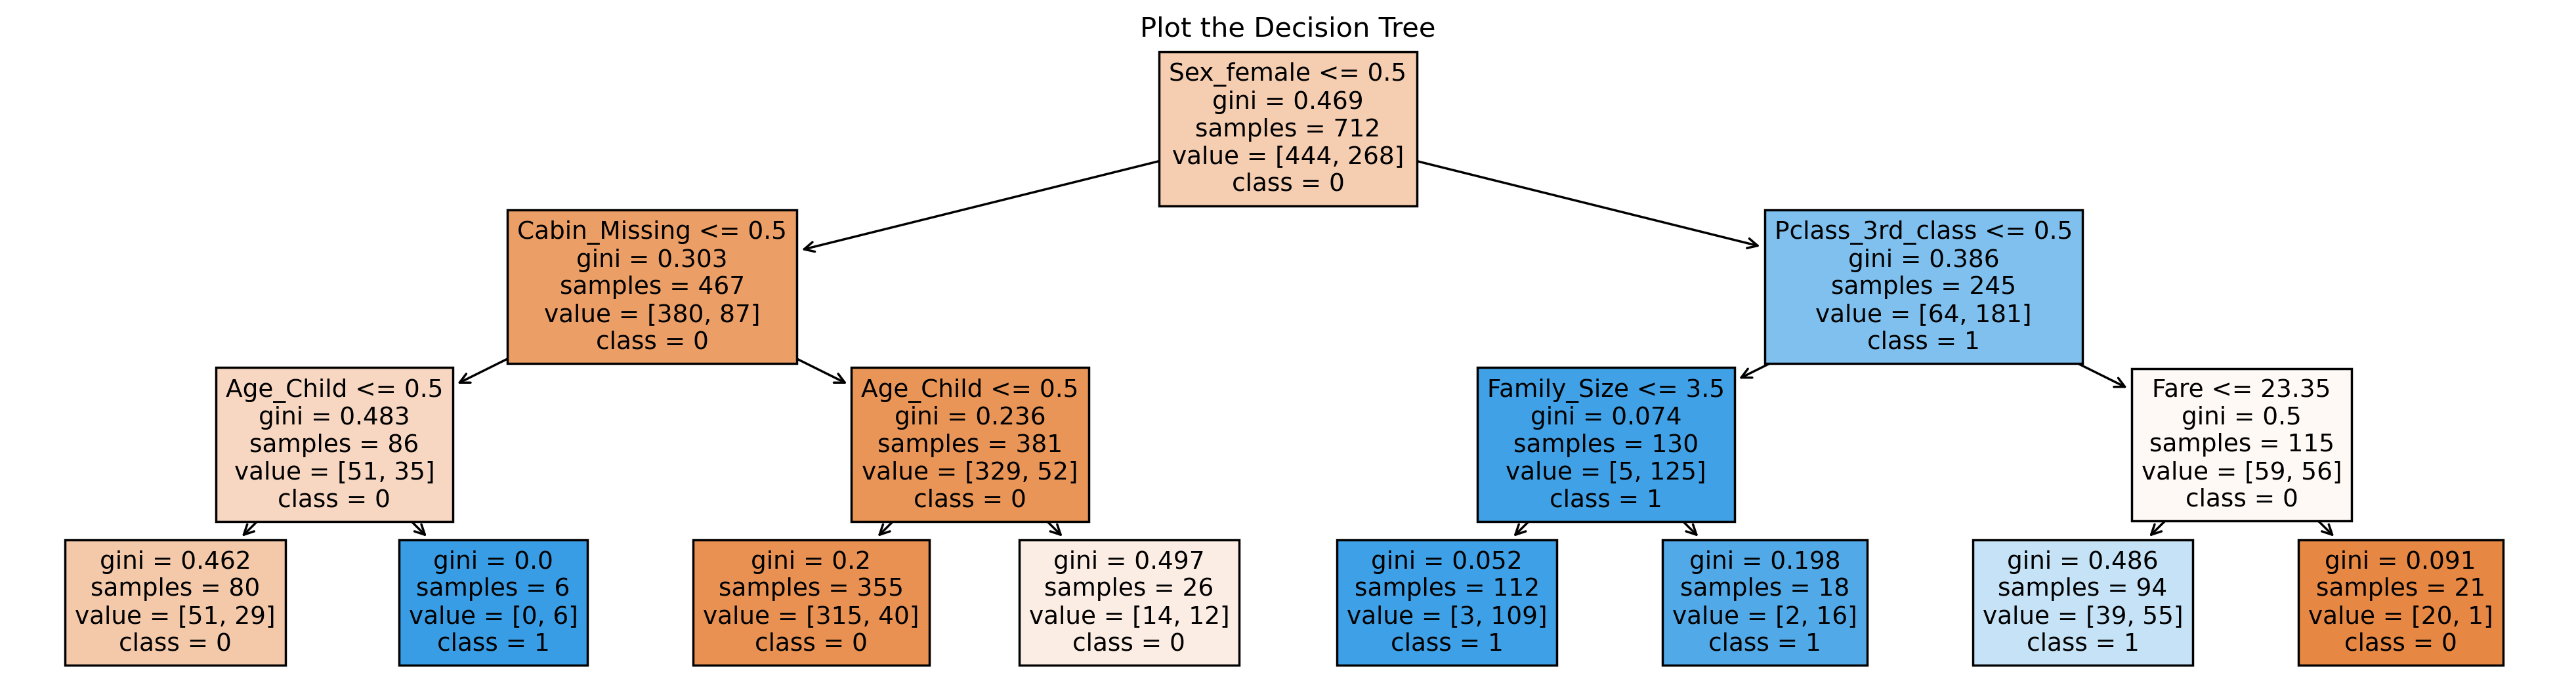

In [60]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming model is your trained DecisionTreeClassifier
fn = list(x_train.columns[:-1])  # Convert the Index to a list
cn = ['0', '1']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5), dpi=250)
plot_tree(model, feature_names=fn, class_names=cn, filled=True)

ax.set_title('Plot the Decision Tree')
plt.show()


In [61]:
predc1= model.predict(x1_test)
pd.Series(predc1).value_counts()

0    115
1     64
Name: count, dtype: int64

In [62]:
pd.crosstab(y1_test,predc1)

col_0,0,1
Survived,,
0,92,13
1,23,51


In [63]:
aquracy = np.mean(predc1==y1_test)
print ('Survival prediction aquracy is  :')
print (aquracy)

Survival prediction aquracy is  :
0.7988826815642458


#### Testing Decsion tree trained model with the new test data set : for survival prediction

In [64]:
y_test= y_test['Survived'] 

In [65]:
predc2=model.predict(y_train)
pd.Series(predc2).value_counts()

0    271
1    147
Name: count, dtype: int64

In [66]:
pd.crosstab(y_test,predc2)

col_0,0,1
Survived,,
0,265,1
1,6,146


In [67]:
aquracy = np.mean(predc2==y_test)
print ('Survival prediction aquracy is  :')
print (aquracy)

Survival prediction aquracy is  :
0.9832535885167464


In [68]:
y_train.columns

Index(['SibSp', 'Parch', 'Fare', 'Cabin_Missing', 'Family_Size',
       'Pclass_1st_class', 'Pclass_2nd_class', 'Pclass_3rd_class',
       'Sex_female', 'Sex_male', 'Age_Child', 'Age_Teenager',
       'Age_Young Adult', 'Age_Adult', 'Age_Senior', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [69]:
Y_train_copy=Y_train.drop(columns=['Pclass','Age', 'SibSp', 'Parch','Ticket', 'Fare', 'Cabin', 'Embarked'])

In [70]:
a = Y_train_copy.copy()
a.loc[:,'predc2'] = predc2
a.loc[:,'y_test'] = y_test
a.head(10)

,PassengerId,Name,Sex,predc2,y_test
0,892,"Kelly, Mr. James",male,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,1,1
2,894,"Myles, Mr. Thomas Francis",male,0,0
3,895,"Wirz, Mr. Albert",male,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1
5,897,"Svensson, Mr. Johan Cervin",male,0,0
6,898,"Connolly, Miss. Kate",female,1,1
7,899,"Caldwell, Mr. Albert Francis",male,0,0
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,1,1
9,901,"Davies, Mr. John Samuel",male,0,0


### Building Decision Tree Classifier using "entropy" as a Criterion

In [71]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model2.fit(x1_train,y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

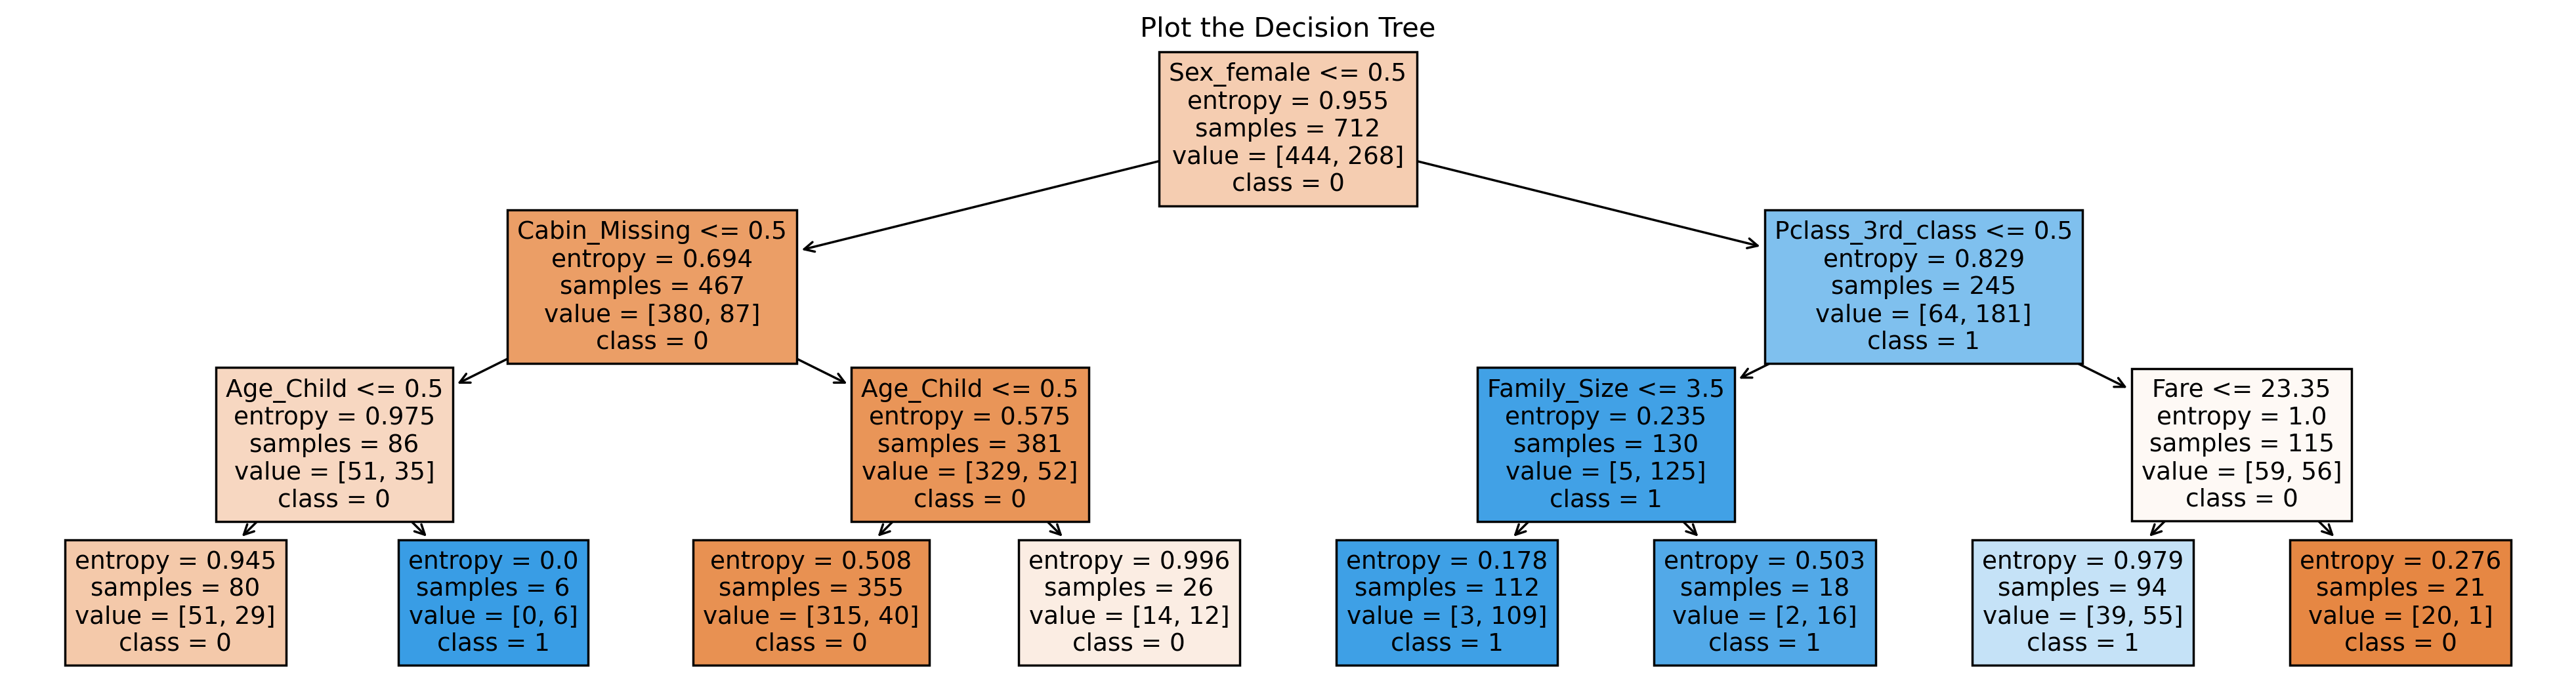

In [72]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming model is your trained DecisionTreeClassifier
fn = list(x_train.columns[:-1])  # Convert the Index to a list
cn = ['0', '1']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5), dpi=250)
plot_tree(model2, feature_names=fn, class_names=cn, filled=True)

ax.set_title('Plot the Decision Tree')
plt.show()


In [73]:
predc2= model2.predict(x1_test)

In [74]:
pd.Series(predc2).value_counts()

0    115
1     64
Name: count, dtype: int64

In [75]:
pd.crosstab(y1_test,predc1)

col_0,0,1
Survived,,
0,92,13
1,23,51


In [76]:
aquracy = np.mean(predc2==y1_test)
print ('Model dibetic prediction aquracy % is  :')
print (aquracy)

Model dibetic prediction aquracy % is  :
0.7988826815642458


### Enssable Learning ( Bagging Classifier )

In [77]:
from sklearn.model_selection import KFold,cross_val_score   #:-  for splitting the dataset into k consecutive folds 

from sklearn.ensemble import BaggingClassifier              #:- fOR Bagging classification 
from sklearn.tree import DecisionTreeClassifier 

In [78]:
kfold = KFold(n_splits=15, shuffle=True, random_state=42)
cart = DecisionTreeClassifier(criterion='gini', max_depth=3)
num_trees = 100


model3 = BaggingClassifier(estimator= cart ,bootstrap=True, n_estimators= num_trees)
results = cross_val_score(model3,X,y,cv=kfold)

In [79]:
results

array([0.85      , 0.81666667, 0.76666667, 0.85      , 0.86666667,
       0.7       , 0.88135593, 0.91525424, 0.88135593, 0.79661017,
       0.79661017, 0.83050847, 0.81355932, 0.79661017, 0.88135593])

In [80]:
print(results.mean())

0.8295480225988701


In [81]:
model3.fit(x1_train,y1_train)
bg_predc= model3.predict(x1_test)
pd.Series(bg_predc).value_counts()

0    113
1     66
Name: count, dtype: int64

In [82]:
pd.crosstab(y1_test,bg_predc)

col_0,0,1
Survived,,
0,92,13
1,21,53


### Enssable Learning (Random Forest Classifier)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [84]:
x1_train.shape

(712, 18)

In [85]:
# # Use SelectFromModel to select features based on importance
sel = SelectFromModel(RandomForestClassifier(n_estimators =200,max_features = 17))
sel.fit(x1_train,y1_train)

SelectFromModel(estimator=RandomForestClassifier(max_features=17,
                                                 n_estimators=200))

In [86]:
sel.get_support()

array([False, False,  True, False,  True, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False])

In [87]:
selected_feat= x1_train.columns[(sel.get_support())]
len(selected_feat)

5

In [88]:
print(selected_feat)

Index(['Fare', 'Family_Size', 'Pclass_3rd_class', 'Sex_female', 'Sex_male'], dtype='object')


In [89]:
# Creating a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators =100,max_features = 17, random_state=42)

# Fiting the model to the training data
rf_model.fit(x1_train, y1_train)

RandomForestClassifier(max_features=17, random_state=42)

In [90]:
# Making predictions on the test data
y_pred_rf = rf_model.predict(x1_test)
pd.Series(y_pred_rf).value_counts()

0    107
1     72
Name: count, dtype: int64

In [92]:
# Calculating accuracy
accuracy = accuracy_score(y1_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.8212290502793296


In [93]:
pd.crosstab(y1_test,y_pred_rf)

col_0,0,1
Survived,,
0,90,15
1,17,57


#### Testing random forest trained model with the new test data set : for survival prediction

In [94]:
y_pred_rf1 = rf_model.predict(y_train)
pd.Series(y_pred_rf1).value_counts()

0    259
1    159
Name: count, dtype: int64

In [96]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_rf1)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.8588516746411483


In [98]:
pd.crosstab(y_test,y_pred_rf1)

col_0,0,1
Survived,,
0,233,33
1,26,126


In [99]:
a1 = Y_train_copy.copy()
a1.loc[:,'Survive_predc.'] = y_pred_rf1
a1.loc[:,'y_test'] = y_test
a1.head(10)

,PassengerId,Name,Sex,Survive_predc.,y_test
0,892,"Kelly, Mr. James",male,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,1,1
2,894,"Myles, Mr. Thomas Francis",male,0,0
3,895,"Wirz, Mr. Albert",male,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1
5,897,"Svensson, Mr. Johan Cervin",male,0,0
6,898,"Connolly, Miss. Kate",female,0,1
7,899,"Caldwell, Mr. Albert Francis",male,0,0
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,1,1
9,901,"Davies, Mr. John Samuel",male,0,0


### AdaBoost Classification

In [101]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [102]:
num_trees = 100
max_features = 15
kfold = KFold(n_splits=15, random_state=7,shuffle=True)
model5 = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(model5, X, y, cv=kfold)
print(results)

[0.8        0.8        0.7        0.76666667 0.85       0.78333333
 0.88135593 0.86440678 0.79661017 0.76271186 0.86440678 0.89830508
 0.77966102 0.77966102 0.77966102]


In [103]:
results.mean()

0.8071186440677967

In [104]:
model5.fit(x1_train,y1_train)
Ada_predc= model5.predict(x1_test)
pd.Series(Ada_predc).value_counts()

0    104
1     75
Name: count, dtype: int64

In [105]:
pd.crosstab(y1_test,Ada_predc)

col_0,0,1
Survived,,
0,84,21
1,20,54


#### Testing AdaBoost trained model with the new test data set : For survival prediction

In [106]:
Ada_predc2= model5.predict(y_train)
pd.Series(predc2).value_counts()

0    115
1     64
Name: count, dtype: int64

In [107]:
# Calculating accuracy
accuracy = accuracy_score(y_test, Ada_predc2)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.9234449760765551


In [108]:
pd.crosstab(y_test,Ada_predc2)

col_0,0,1
Survived,,
0,246,20
1,12,140


In [109]:
a2 = Y_train_copy.copy()
a2.loc[:,'Survive_predc.'] = Ada_predc2
a2.loc[:,'y_test'] = y_test
a2.head(10)

,PassengerId,Name,Sex,Survive_predc.,y_test
0,892,"Kelly, Mr. James",male,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,1,1
2,894,"Myles, Mr. Thomas Francis",male,0,0
3,895,"Wirz, Mr. Albert",male,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1
5,897,"Svensson, Mr. Johan Cervin",male,0,0
6,898,"Connolly, Miss. Kate",female,1,1
7,899,"Caldwell, Mr. Albert Francis",male,0,0
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,1,1
9,901,"Davies, Mr. John Samuel",male,0,0
